In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import scipy as sp
from scipy import interpolate
from scipy import integrate


In [ ]:
d = 0.5 #m. Diâmetro do furo próximo ao fundo
D = 6 #m. Diâmetro do do tanque vertical cilíndrico
Q = 0.00425 #Taxa de entrada do líquido
h0 = 27 #Altura inicial da petróleo no tanque
g = 9.81 #Gravidade
h = 1 #Altura final da petróleo no tanque

In [ ]:
def funcao_vazamento():
  return lambda y: 1/( (4*Q)/(np.pi*D**2) - ((d**2)/(D**2)*np.sqrt(2*g*y)))

In [ ]:
f = funcao_vazamento()

v,e = integrate.quad(f, h0, h)

print(f"Integral é: {v}s")

Integral é: 273.35617461314973s


In [ ]:
f = funcao_vazamento()
pontos = np.linspace(h0, h)
v = integrate.cumtrapz(f(pontos), pontos)[-1]

In [ ]:
f = funcao_vazamento()

pontos = np.linspace(h0, h)

v = integrate.cumtrapz(f(pontos), pontos)[-1]

print(f"Integral é: {v}s",)

Integral é: 273.7323592195866s


In [ ]:
f = funcao_vazamento()

I_QG, err = integrate.quadrature(f, h0, h)
print(f"A integral é de: {I_QG:.10f}s")

A integral é de: 273.3561724687s


In [ ]:
f = funcao_vazamento()

pontos = np.linspace(f(h0), f(h))

pontos_x = np.linspace(h0,h)

v = integrate.trapz(pontos, pontos_x)

print(f"Integral é: {v}s",)

Integral é: 506.1124851834712s


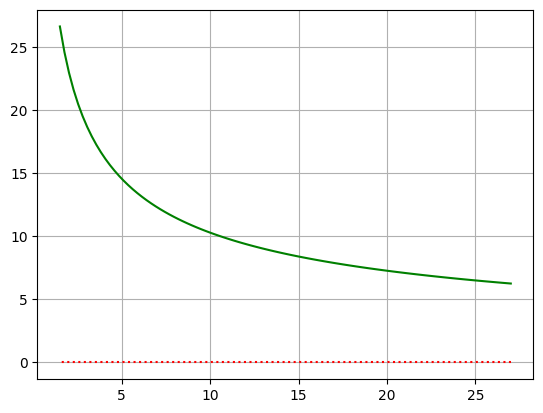

In [ ]:
f = funcao_vazamento()

x = np.linspace(h0,1.5,100)
plt.plot(x,abs(f(x)),'g',x,0*f(x),'r:')
plt.grid()

In [ ]:
valores_x = np.linspace(h,h0,10)

valores_y = []
for i in range(0, len(valores_x)):
  valores_y.append(abs(f(valores_x[i])))

In [ ]:
def criar_area_trapezio(ponto1, ponto2):
  for i in range(ponto1, ponto2):
    plt.plot(xd[i],abs(f(xd[i])), 'o', label = f'f(x{i})', color="#004AAD")
    plt.plot(xd[i+1],abs(f(xd[i+1])), 'o', label = f'f(x{i+1})', color="#004AAD")
    plt.fill([xd[i], xd[i], xd[i+1], xd[i+1]],[0, abs(f(xd[i])), abs(f(xd[i+1])), 0], color='r', alpha=i*0.1, label = f'Área do Trapézio {i+1}')

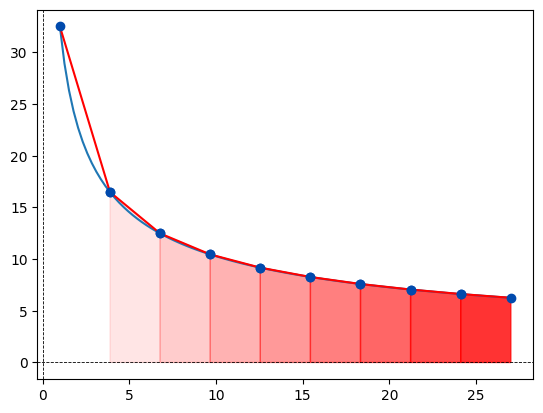

In [ ]:
xd = valores_x
yd = valores_y

x = np.linspace(h0,h,100)
y = abs(f(x))

plt.plot(x,y, label = 'f(x)')
plt.plot(xd,yd, 'r')
criar_area_trapezio(0,9)
# plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--');

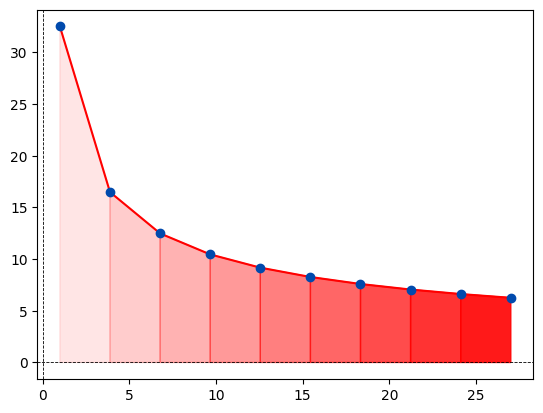

In [ ]:
# sem usar a funcao
xd = valores_x
yd = valores_y

x = np.linspace(h0,h,100)
y = abs(f(x))

# plt.plot(x,y, label = 'f(x)') # sem plotar a f(x)
plt.plot(xd,yd, 'r')
plt.plot(xd[0],abs(f(xd[0])), 'o', label = 'f(x0)', color="#004AAD")
plt.plot(xd[1],abs(f(xd[1])), 'o', label = 'f(x1)', color="#004AAD")
plt.plot(xd[2],abs(f(xd[2])), 'o', label = 'f(x2)', color="#004AAD")
plt.plot(xd[3],abs(f(xd[3])), 'o', label = 'f(x3)', color="#004AAD")
plt.plot(xd[4],abs(f(xd[4])), 'o', label = 'f(x4)', color="#004AAD")
plt.plot(xd[5],abs(f(xd[5])), 'o', label = 'f(x5)', color="#004AAD")
plt.plot(xd[6],abs(f(xd[6])), 'o', label = 'f(x6)', color="#004AAD")
plt.plot(xd[7],abs(f(xd[7])), 'o', label = 'f(x7)', color="#004AAD")
plt.plot(xd[8],abs(f(xd[8])), 'o', label = 'f(x8)', color="#004AAD")
plt.plot(xd[9],abs(f(xd[9])), 'o', label = 'f(x9)', color="#004AAD")
plt.fill([xd[0], xd[0], xd[1], xd[1]],[0, abs(f(xd[0])), abs(f(xd[1])), 0], color='r', alpha=0.1, label = 'Área do Trapézio 1')
plt.fill([xd[1], xd[1], xd[2], xd[2]],[0, abs(f(xd[1])), abs(f(xd[2])), 0], color='r', alpha=0.2, label = 'Área do Trapézio 2')
plt.fill([xd[2], xd[2], xd[3], xd[3]],[0, abs(f(xd[2])), abs(f(xd[3])), 0], color='r', alpha=0.3, label = 'Área do Trapézio 3')
plt.fill([xd[3], xd[3], xd[4], xd[4]],[0, abs(f(xd[3])), abs(f(xd[4])), 0], color='r', alpha=0.4, label = 'Área do Trapézio 4')
plt.fill([xd[4], xd[4], xd[5], xd[5]],[0, abs(f(xd[4])), abs(f(xd[5])), 0], color='r', alpha=0.5, label = 'Área do Trapézio 5')
plt.fill([xd[5], xd[5], xd[6], xd[6]],[0, abs(f(xd[5])), abs(f(xd[6])), 0], color='r', alpha=0.6, label = 'Área do Trapézio 6')
plt.fill([xd[6], xd[6], xd[7], xd[7]],[0, abs(f(xd[6])), abs(f(xd[7])), 0], color='r', alpha=0.7, label = 'Área do Trapézio 7')
plt.fill([xd[7], xd[7], xd[8], xd[8]],[0, abs(f(xd[7])), abs(f(xd[8])), 0], color='r', alpha=0.8, label = 'Área do Trapézio 8')
plt.fill([xd[8], xd[8], xd[9], xd[9]],[0, abs(f(xd[8])), abs(f(xd[9])), 0], color='r', alpha=0.9, label = 'Área do Trapézio 9')
# plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--')

